In [38]:
# Import required libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [39]:

# Reshape data to 4D tensor for CNN (no of samples, height, width, channels)
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1)).astype('float32') / 255


train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

print(train_images.shape)
print(test_images.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [17]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [40]:

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))


# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))

# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(64, activation='relu'))

model.add(layers.Dense(10, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [41]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [42]:
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.1)

test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc * 100:.2f}%')


Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 25s 27ms/step - accuracy: 0.8718 - loss: 0.4490 - val_accuracy: 0.9777 - val_loss: 0.0861
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 42s 28ms/step - accuracy: 0.9761 - loss: 0.0803 - val_accuracy: 0.9832 - val_loss: 0.0595
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 23s 27ms/step - accuracy: 0.9839 - loss: 0.0531 - val_accuracy: 0.9838 - val_loss: 0.0580
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 41s 27ms/step - accuracy: 0.9885 - loss: 0.0374 - val_accuracy: 0.9850 - val_loss: 0.0538
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 40s 26ms/step - accuracy: 0.9914 - loss: 0.0277 - val_accuracy: 0.9860 - val_loss: 0.0537
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9787 - loss: 0.0657
Test accuracy: 98.27%


In [36]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'Test accuracy: {test_acc * 100:.2f}%')

313/313 - 2s - 5ms/step - accuracy: 0.1135 - loss: 2.3010
Test accuracy: 11.35%


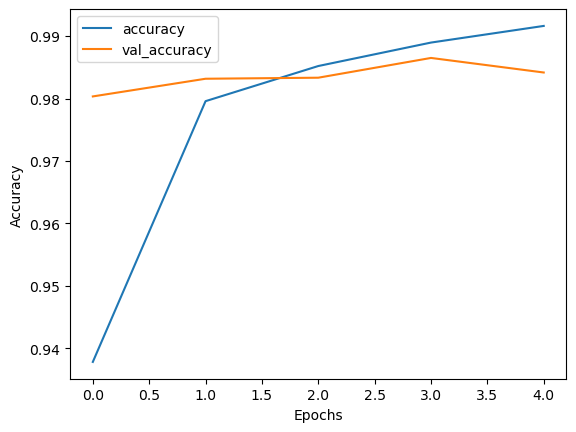

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
test_images.shape

(10000, 28, 28, 1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


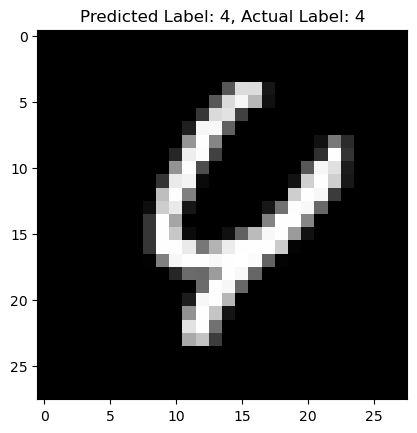

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

random_index = np.random.randint(0, test_images.shape[0])

selected_image = test_images[random_index]
selected_label = test_labels[random_index]

prediction = model.predict(np.expand_dims(selected_image, axis=0))
predicted_label = np.argmax(prediction)  # The label with the highest probability

plt.imshow(selected_image.reshape(28, 28), cmap='gray')
plt.title(f'Predicted Label: {predicted_label}, Actual Label: {np.argmax(selected_label)}')
plt.show()
